#### 주성분 분석
> - 여러 개의 독립변수들을 잘 설명해줄 수 있는 주된 성분을 추출하는 기법
> - 전체 변수들의 핵심 특성만 선별 -> 독립변수(차원)의 수를 줄일 수 있다.
> - 여러 개의 변수들이 소수의 특정한 소수의 변수들로 축약되도록 가공 -> 모형을 간단하게 만들 수 있고 분석 결과를 보다 효과적으로 해석할 수 있다.
> - 변수 선택을 통해 비교적 불필요하거나 유의 성이 낮은 변수를 제거한다.
> - => 변수의 수를 축약하면서 정보의 손실을 최소화하고자 할 때 사용

#### 차원의 저주
> - 변수가 늘어남에 따라 차원이 커지면서 분석을 위한 최소한의 필요 데이터 건수가 늘어나면서 예측이 불안정해지는 문제

#### PCA
> - 다차원의 데이터 분포를 가장 잘 설명해준다.
> - 데이터 공간에 위치하는 점들의 분산을 최대한 보존하는 축을 통해 차원을 축소하는 것이 핵심 요소
> - 처음 가지고 있던 변수의 개수만큼 새로운 성분변수가 생성된다.
> - 하지만 전체 변수 설명력이 높은 주성분 변수만 선정해 총 변수의 개수를 줄일 수 있다.

In [5]:
#픽셀 = 특성 = 차원

# 차원 축소
# 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다.
# 차원 축소는 데이터를 가장 잘 나타내는 일부 트성을 선택해 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법
# 원본 차원으로 복원 가능

# 주성분 분석 = pca -> 분산이 큰 방향 찾기(데이터가 널리 퍼져있는 정도), 분산이 큰 방향 = 데이터를 잘 표현하는 어떤 벡터
# 사이킷런의 PCA는 자동으로 특성마다 평균값을 빼서 원점에 맞춰준다.

# 주성분 벡터의 원소 개수 = 원본 데이터셋에 있는 특성 개수
# 원본 데이터는 주성분을 이용해 차원을 줄일 수 있다.
# 주성분은 원본 차원과 같다.
# 주성분에 투영해 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타낸다 -> 주성분 = 분산이 가장 큰 방향

# 첫 번째 주성분을 찾은 다음 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. = 두 번째 주성분
# 원본 특성의 개수만큼 찾을 수 있다.

# 배열 = 텐서

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('../fruits_300.npy')
print(fruits.shape)
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

(300, 100, 100)
(300, 10000)


(50, 10000)

(300, 50)
[[-2.77841779e+03 -1.57187381e+03 -1.33533774e+03 -1.54134681e+03
   3.01773975e+02  3.08058033e+02 -3.19610440e+02 -5.21959376e+02
  -1.42036892e+02 -1.40085299e+03  9.30925085e+02 -2.23874996e+02
   1.12421394e+02 -1.19041272e+01  8.42915056e+01  4.45573890e+02
   5.28798247e+02 -2.68829513e+02  1.53727860e+02 -1.92462636e+02
  -3.36428090e+01  4.69750536e+02  1.79345164e+02 -1.30465246e+02
   2.26215506e+02  6.70765596e+01 -5.13772472e+01 -1.08488669e+01
   6.57873603e+01 -1.83838581e+02 -3.96008933e+01 -1.66708221e+02
  -4.28427168e+01  5.21857380e+01 -1.02846745e+02  3.33203727e+00
   7.11080015e+00 -1.30057853e+02  6.34650119e+01 -6.51843087e+01
   1.16690304e+02  1.39078452e+02 -5.93562575e-01 -7.97903434e+01
  -6.63720040e+00  1.78088517e+01  7.13803174e+01  2.59561583e+01
   7.41307028e+01 -8.41847516e+01]
 [-3.07827365e+03 -2.73927041e+03 -6.36183375e+02 -1.29571236e+02
  -1.11490825e+03  1.03140768e+03  5.18876763e+02  4.86934534e+01
   7.87877202e+02 

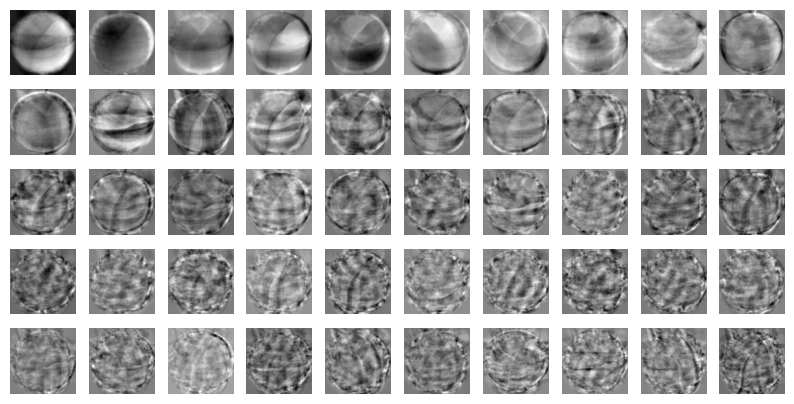

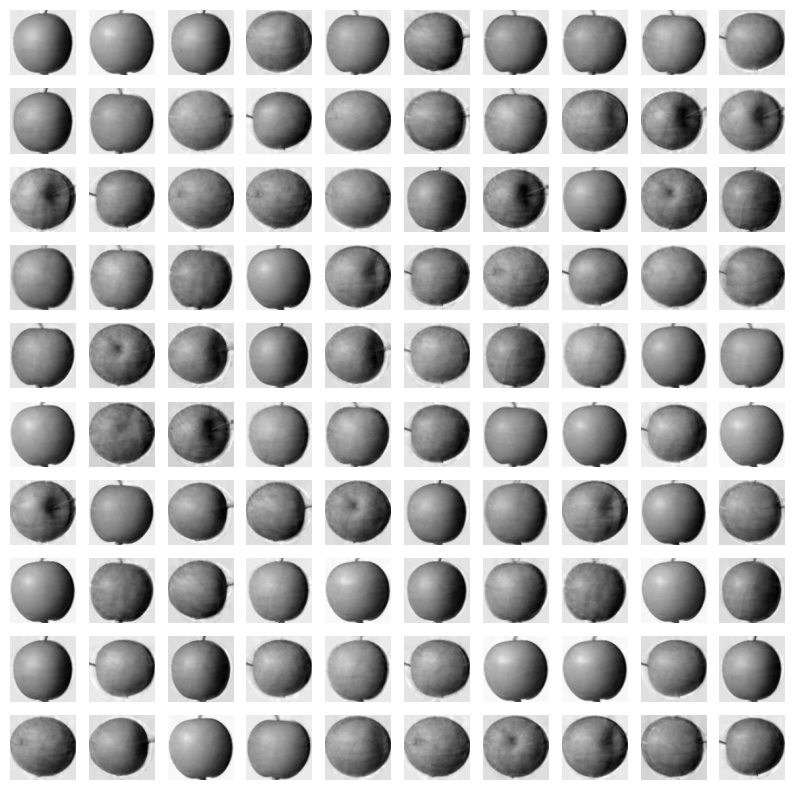

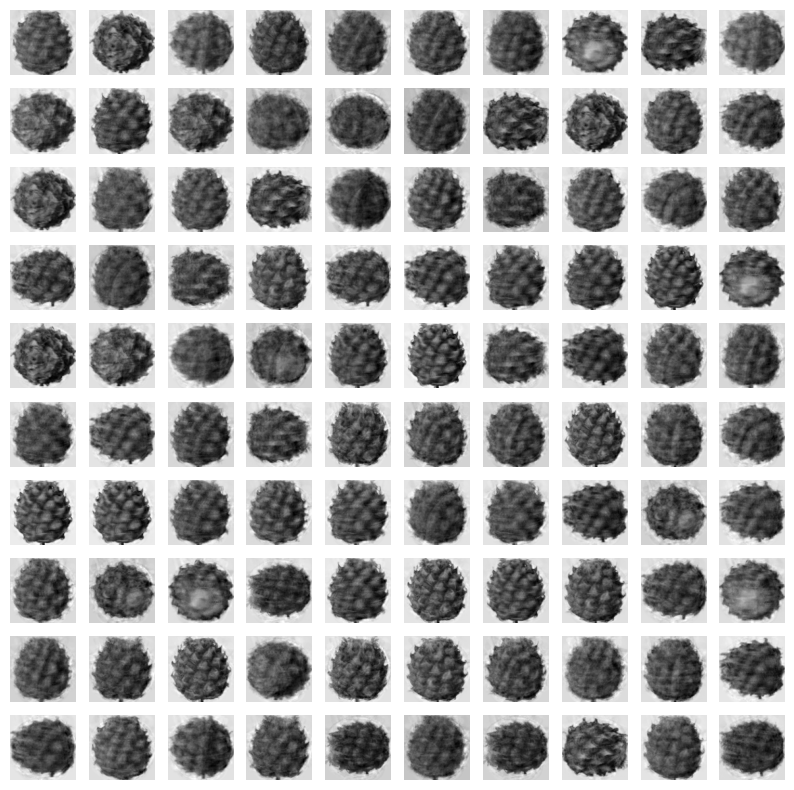

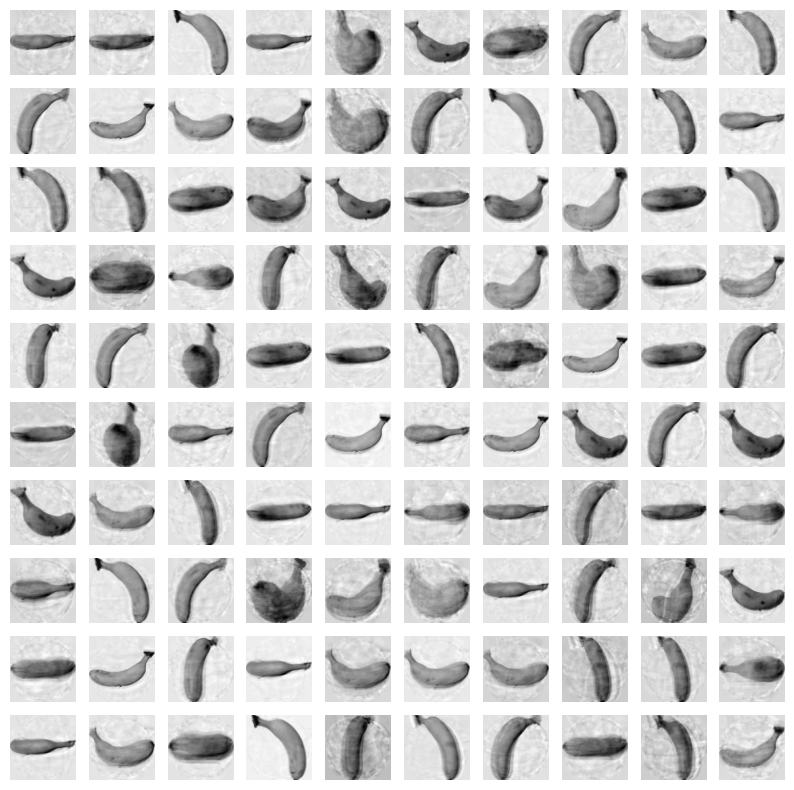

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분의 개수 지정
pca.fit(fruits_2d)

#.components_에 주성분 저장
print(pca.components_.shape) #두 번째 차원 = 원본 데이터의 특성 개수
print()

def draw_fruits(arr, ratio=1):
  n = len(arr) #샘플의 개수
  #한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10)) #ceil 올림
  #행이 1개이면 열의 개수는 샘플의 개수, 그렇지 않으면 10개
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:  #n개까지만 그린다.
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show

draw_fruits(pca.components_.reshape(-1, 100, 100))

#원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것 = 데이터셋에 있는 어떤 특징을 잡아낸 것
#주성분 -> 특성의 개수 줄일 수 있다. = 원본 데이터를 각 주성분으로 분해하는 것

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
print(fruits_pca[:2])

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

0.9215067296268524


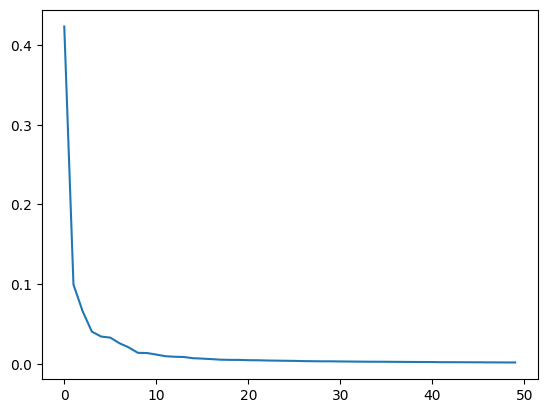

In [8]:
#설명된 분산
#주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
#첫 번째 주성분의 설명된 분산이 가장 크다.
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()
#처음 10개의 주성분이 대부분의 분산을 표현

In [9]:
#다른 알고리즘과 함께 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)
print(target)

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) #교차 검증 정수
print(np.mean(scores['fit_time'])) #훈련 시간
print()

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
print()

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)
print()

#원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# print(fruits_pca)
print()

scores = cross_validate(lr, fruits_pca, target);
print(np.mean(scores['test_score']));
print(np.mean(scores['fit_time']));

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
0.9966666666666667
9.717862987518311

0.9966666666666667
0.015047597885131835

2

(300, 2)

0.9933333333333334
0.03344120979309082


/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))








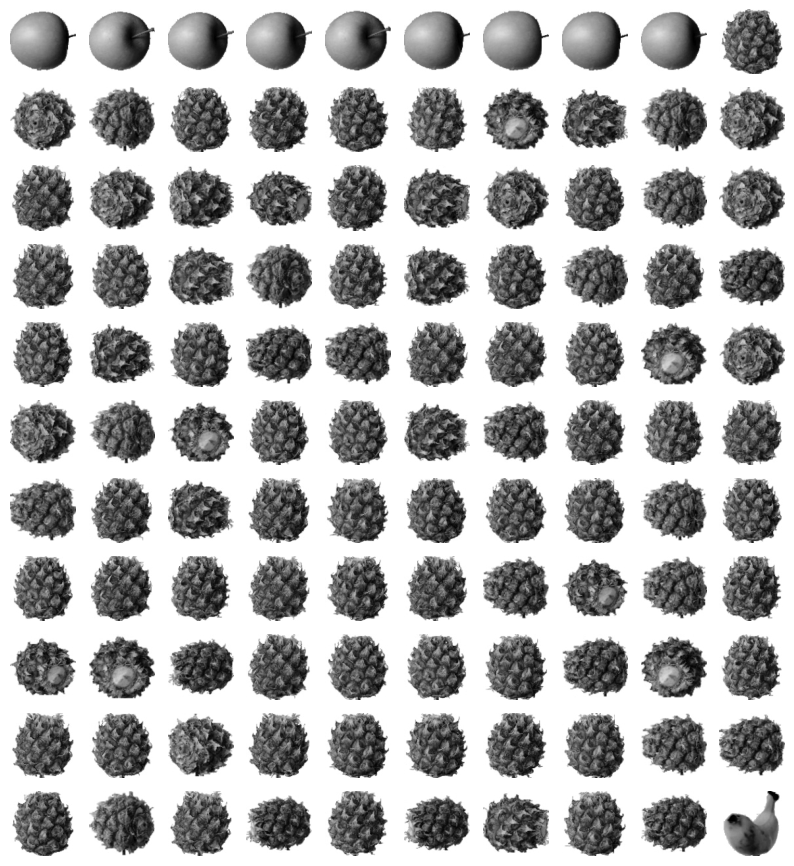

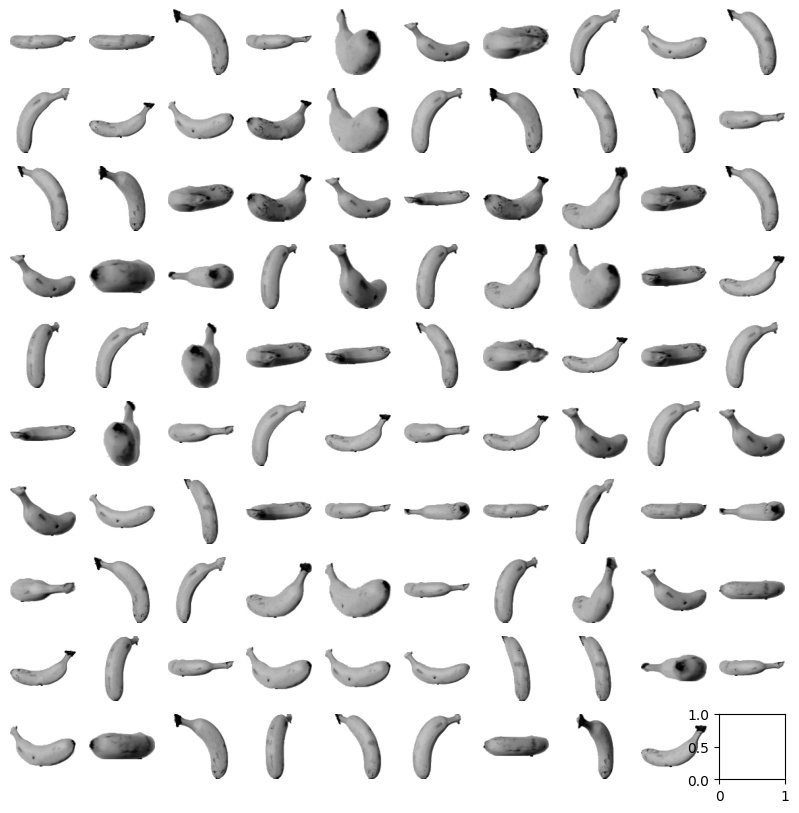

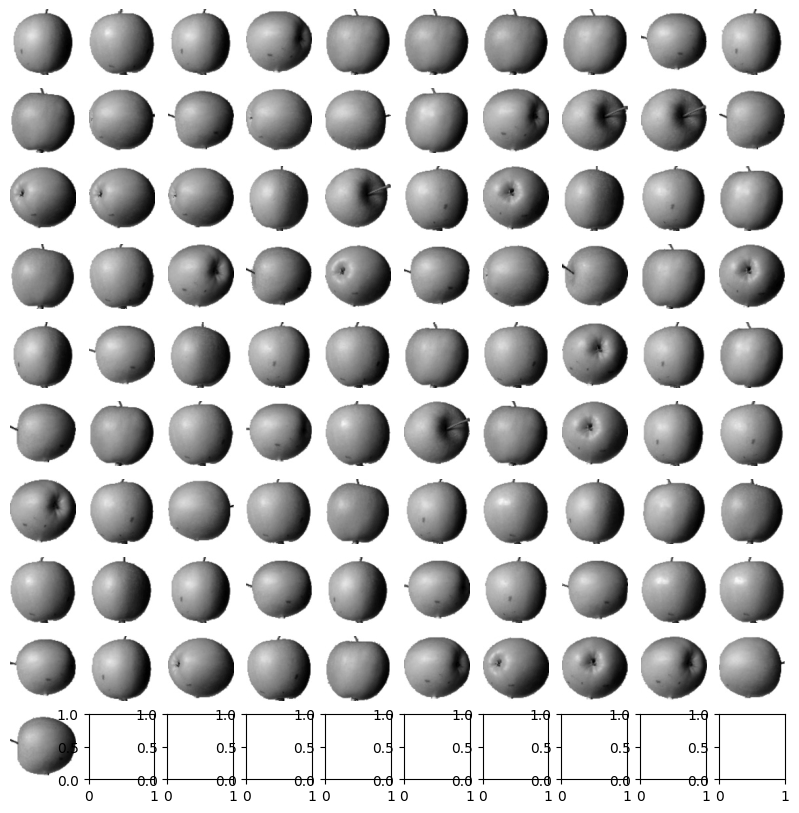

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

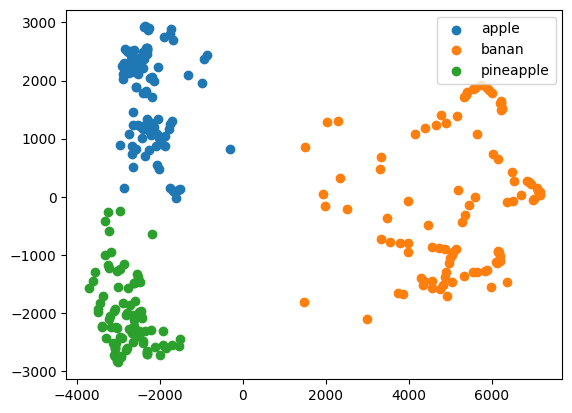

In [11]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banan', 'pineapple'])
plt.show()